<a href="https://colab.research.google.com/github/rmDL4SON/Git_Practice/blob/main/T_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform t-test to check wheter two samples distribution have different with respect of the mean value.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [14]:
def plot_distribution(inp):
  plt.figure()
  ax = sns.distplot(inp)
  plt.axvline(np.mean(inp), color='k', linestyle='--')
  _, max_ = plt.ylim()
  plt.text(
      inp.mean() + inp.mean()/10,
      max_ -max_ /10,
      "Mean: {:.3f}".format(inp.mean())
  )
  return plt.figure

In [12]:
from google.colab import drive

# Mount your Google Drive to Colab
drive.mount('/content/drive')

# Create a directory to store your input data
data_dir = '/content/sample_data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
ger_sales = np.load(data_dir + "germany_sales.npy")
ger_sales

array([5255, 6677, 5320, 2747, 4863,  723, 1115,  974,    5, 1495, 1653,
       2050, 2034, 4927, 5708, 6008, 5388, 5264, 2619, 3384, 3008, 1062,
       2279, 2512, 3032, 2750, 3719, 4638, 4558, 3977,  483, 1873, 2220,
       2180, 2946, 1706, 1866, 2635, 2544, 4991, 4604, 5291, 4579, 2183,
       2251, 2375, 3372, 2842, 2075, 2508, 2583, 2877, 5455, 5787, 5845,
       5396, 2636, 2470, 2755, 3443, 3661, 2302, 2541, 2548, 2906])

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

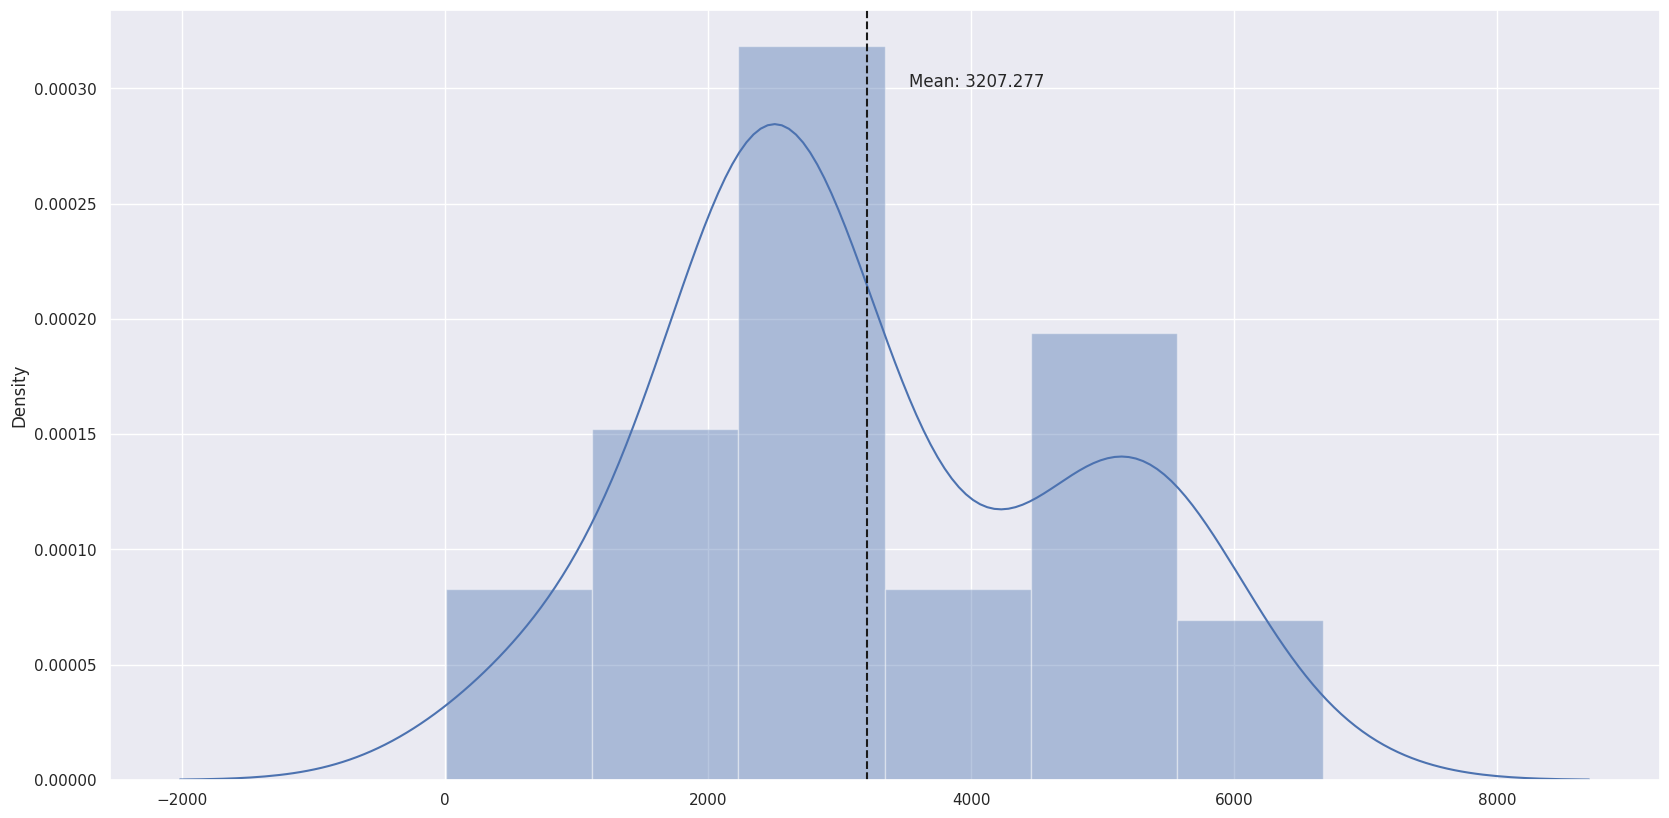

In [15]:
plot_distribution(ger_sales)

In [17]:
fr_sales = np.load(data_dir + "france_sales.npy")
fr_sales

array([   0,  168,  123,  317,  130,  203,  277,  276,  416,   89,  188,
        703,  109,  215, 1537, 2032, 1674, 1558, 2030, 1838, 1810, 2418,
        124, 1463, 1297, 1169, 1511])

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

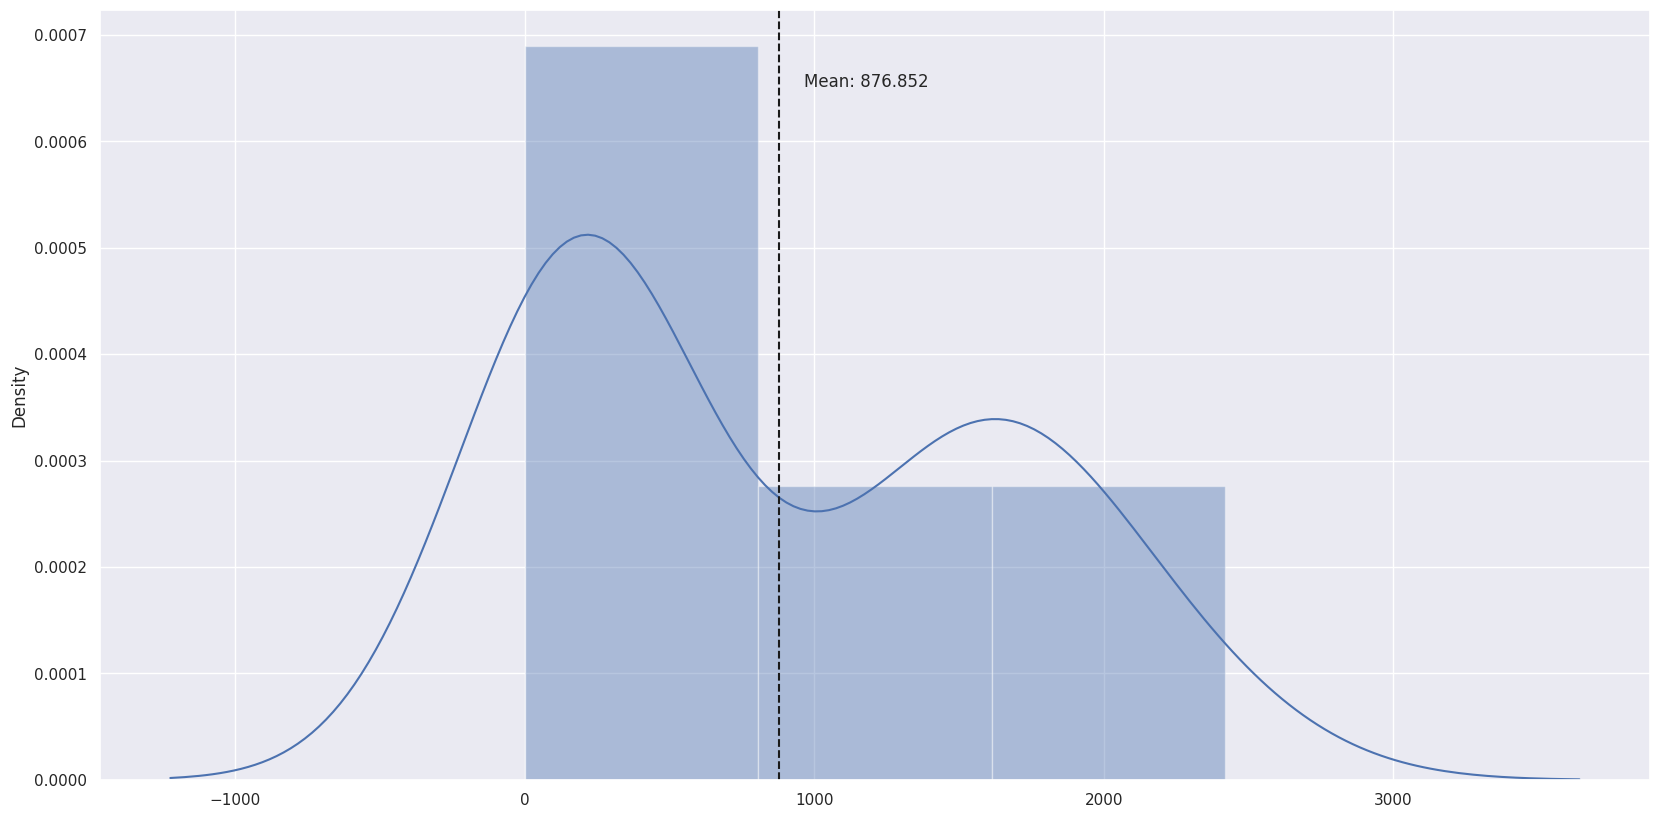

In [18]:
plot_distribution(fr_sales)

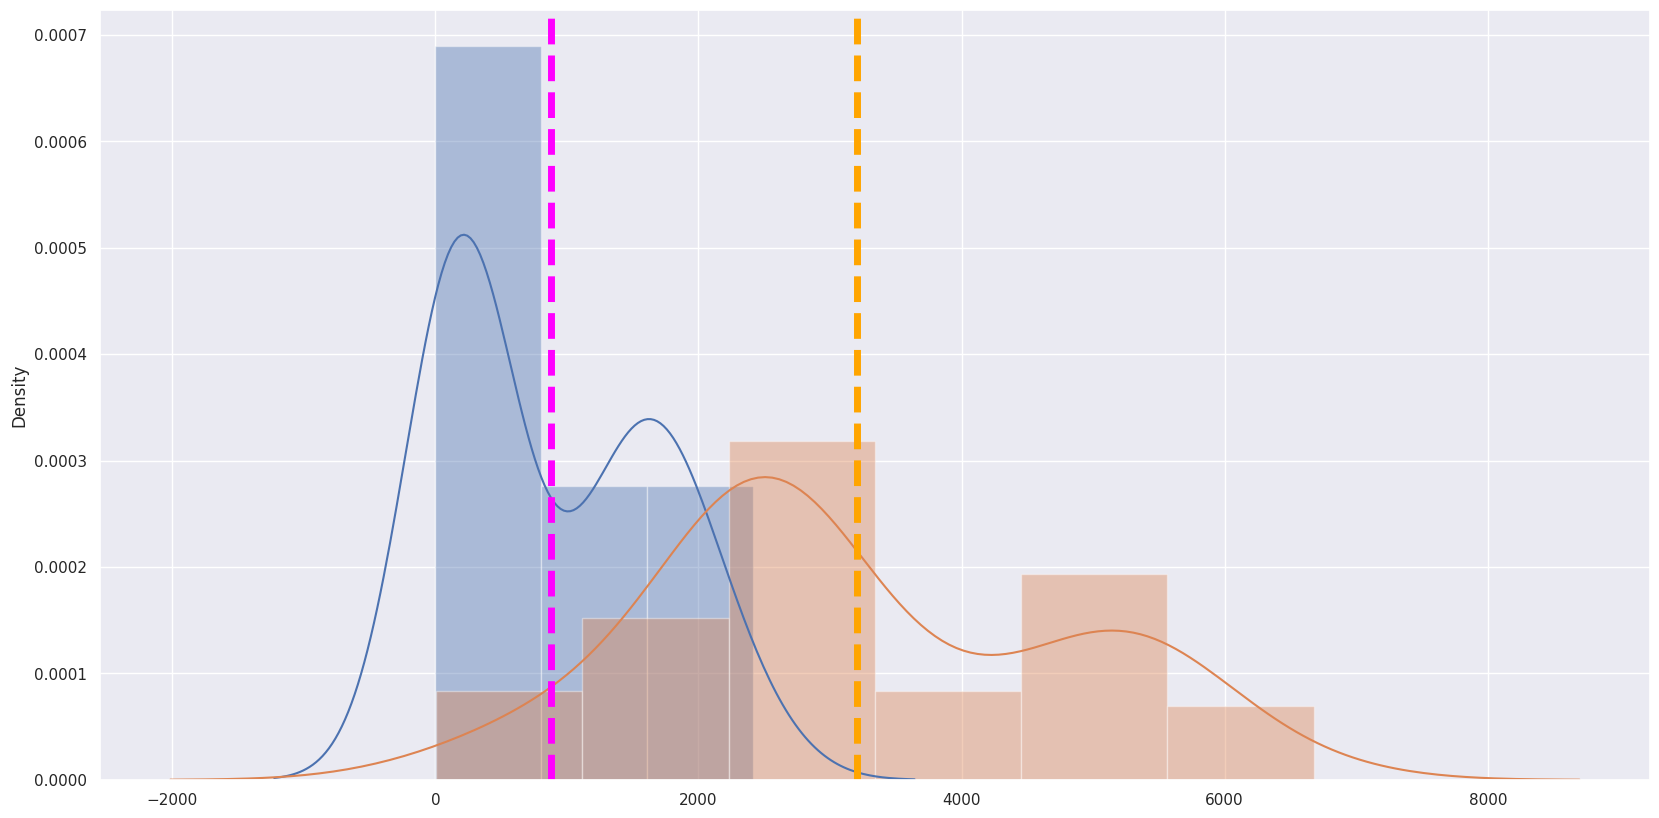

In [19]:
plt.figure()
ax1 = sns.distplot(fr_sales)
ax2 = sns.distplot(ger_sales)
plt.axvline(np.mean(fr_sales), color='magenta', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(ger_sales), color='orange', linestyle='dashed', linewidth=5)

In [30]:
def compare_2_dist_groups(grp_1, grp_2, alpha, sample_size):
  stat, p = ttest_ind(grp_1, grp_2)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  if p > alpha:
    print('Same distribution hence fail to Reject H0')
  else:
    print(('Different distribution hence reject H0'))

In [31]:
sample_size = 30
ger_sampled = np.random.choice(ger_sales, sample_size)
fr_sampled = np.random.choice(fr_sales, sample_size)
compare_2_dist_groups(ger_sampled, fr_sampled, 0.05, sample_size)

Statistics=9.098, p=0.000
Different distribution hence reject H0
